Matplotlib created a temporary cache directory at /jobfs/129457517.gadi-pbs/matplotlib-68e08ml9 because the default path (/home/563/ab2313/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


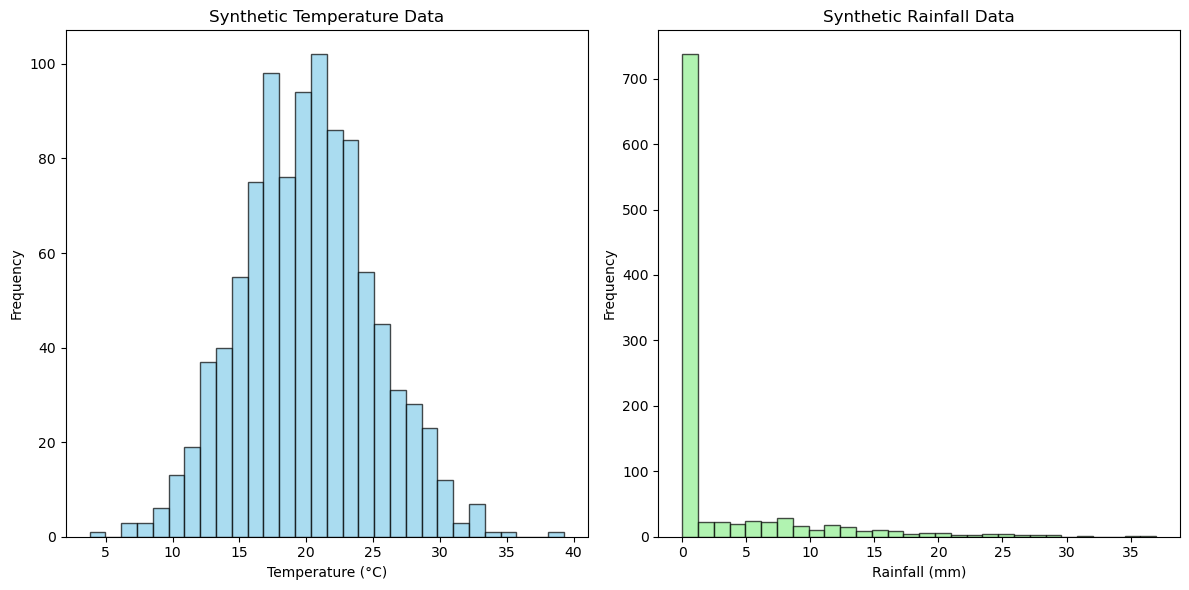

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Random seed for reproducibility
np.random.seed(42)

# Generate synthetic temperature data (Normal distribution)
n = 1000  # Number of samples
temp_mean = 20  # Mean temperature in Celsius
temp_std = 5     # Standard deviation
temperature = np.random.normal(temp_mean, temp_std, n)

# Generate synthetic rainfall data (Gamma distribution)
rain_shape = 2  # Shape parameter
rain_scale = 5  # Scale parameter
rainfall = np.random.gamma(rain_shape, rain_scale, n)

# Introduce zeros for dry days
rainfall[np.random.rand(n) < 0.7] = 0  # 70% dry days

# Visualize the data
plt.figure(figsize=(12, 6))

# Temperature histogram
plt.subplot(1, 2, 1)
plt.hist(temperature, bins=30, color='skyblue', alpha=0.7, edgecolor='k')
plt.title('Synthetic Temperature Data')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Rainfall histogram
plt.subplot(1, 2, 2)
plt.hist(rainfall, bins=30, color='lightgreen', alpha=0.7, edgecolor='k')
plt.title('Synthetic Rainfall Data')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [2]:
temp = temperature
rain = rainfall

In [3]:
import numpy as np
from scipy.stats import rankdata

# Convert data to uniform margins
u_temp = rankdata(temp) / (len(temp) + 1)  # Avoid 1 by using len(temp) + 1
u_rain = rankdata(rain) / (len(rain) + 1)


In [4]:
pip show copulas

Name: copulas
Version: 0.12.0
Summary: Create tabular synthetic data using copulas-based modeling.
Home-page: 
Author: 
Author-email: "DataCebo, Inc." <info@sdv.dev>
License: BSL-1.1
Location: /home/563/ab2313/test_venv/lib/python3.10/site-packages
Requires: numpy, pandas, plotly, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [5]:
from copulas.univariate import GaussianKDE
from copulas.bivariate import GaussianCopula

# Fit the copula
copula = GaussianCopula()
copula.fit(np.column_stack((u_temp, u_rain)))

# Access parameters of the fitted copula
copula_parameters = copula.to_dict()


ImportError: cannot import name 'GaussianCopula' from 'copulas.bivariate' (/home/563/ab2313/test_venv/lib/python3.10/site-packages/copulas/bivariate/__init__.py)